
## Import Library


In [ ]:
import os
import random
import shutil
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential

## Enter Data



### download data



In [ ]:
! pip install -q kaggle
# Mount your Google Drive.
# from google.colab import drive
# drive.mount("/content/drive")

# !cp /content/drive/MyDrive/kaggle/kaggle.json /content/
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle/kaggle.json  ~/.kaggle/
# !cp c ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle': No such file or directory


In [ ]:
!kaggle datasets download -d amirmahdiabbootalebi/persian-handwritten-digits

 83% 97.0M/117M [00:01<00:00, 67.1MB/s]
100% 117M/117M [00:01<00:00, 68.7MB/s] 


In [ ]:
!unzip /content/persian-handwritten-digits.zip

In [ ]:
!cp /content/drive/MyDrive/DL/persian-handwritten-digits-2.zip /content/

In [ ]:
!rm -rf /content/content/

In [ ]:
# import os
def get_files_from_folder(folder_path):
    files_dict = {}

    for folder_name, subfolders, filenames in os.walk(folder_path):
        if folder_name.split("/")[-1].split("_")[-1] == os.path.basename(folder_path):
            pass
        else:
            files_dict[folder_name.split("/")[-1].split("_")[-1]] = []

        for filename in filenames:
            file_ext = os.path.splitext(filename)[1]
            if file_ext.lower() == ".jpg":
                files_dict[folder_name.split("/")[-1].split("_")[-1]].append(os.path.join(folder_name, filename))

    return files_dict

files_test = get_files_from_folder('/content/Test')
files_train = get_files_from_folder('/content/Train')
# files = {**files_test, **files_train}


In [ ]:
def merge_dicts(dict1, dict2):
    merged_dict = dict1.copy()
    for key, value in dict2.items():
        if key in merged_dict:
            merged_dict[key].extend(value)
        else:
            merged_dict[key] = value
    return merged_dict

merged_dict = merge_dicts(files_test,files_train)


def allpath(d):
  l = []
  for k, v in d.items():
    l.extend(v)
  return l


adrsfile = allpath(merged_dict)


In [ ]:
# import random

def split_dataset(data, train_ratio, test_ratio, val_ratio):
    random.seed(42)
    random.shuffle(data)

    total_len = len(data)

    train_len = int(total_len * train_ratio)
    test_len = int(total_len * test_ratio)
    val_len = int(total_len * val_ratio)

    train_data = data[:train_len]
    test_data = data[train_len:train_len+test_len]
    val_data = data[train_len+test_len:]

    return train_data, test_data, val_data

taradrsfile ,tsadrsfile ,valadrsfile = split_dataset(adrsfile, 0.7, 0.2, 0.1)

In [ ]:
!mkdir /content/persian-handwritten-digits
!mkdir /content/persian-handwritten-digits/Train
!mkdir /content/persian-handwritten-digits/Test
!mkdir /content/persian-handwritten-digits/Vallidation

mkdir: cannot create directory ‘/content/persian-handwritten-digits’: File exists
mkdir: cannot create directory ‘/content/persian-handwritten-digits/Train’: File exists
mkdir: cannot create directory ‘/content/persian-handwritten-digits/Test’: File exists
mkdir: cannot create directory ‘/content/persian-handwritten-digits/Vallidation’: File exists


In [ ]:
# import shutil

def CopyToF(listFile,Path):
  for filepath in listFile:
    if not os.path.exists(os.path.join(Path, os.path.basename(os.path.dirname(filepath)))):
      os.mkdir(os.path.join(Path, os.path.basename(os.path.dirname(filepath))))
    shutil.copy(filepath, os.path.join(Path, os.path.basename(os.path.dirname(filepath))))

  print(len(listFile), "copy to dir")

CopyToF(taradrsfile, "/content/persian-handwritten-digits/Train")
CopyToF(tsadrsfile, "/content/persian-handwritten-digits/Test")
CopyToF(valadrsfile, "/content/persian-handwritten-digits/Vallidation")


In [ ]:
shutil.make_archive("/content/persian-handwritten-digits-2", 'zip', "/content/persian-handwritten-digits")

### move data

In [ ]:
!cp /content/drive/MyDrive/DL/persian-handwritten-digits-2.zip /content/

In [ ]:
!mkdir /content/persian-handwritten-digits
!unzip /content/persian-handwritten-digits-2.zip -d /content/persian-handwritten-digits

## Model

In [ ]:
# from keras.preprocessing.image import ImageDataGenerator

imgGenT = ImageDataGenerator(rescale= 1/255)

trianDataSet = imgGenT.flow_from_directory(
    "/content/persian-handwritten-digits/Train",
    batch_size= 64,
    class_mode="categorical",
    shuffle=False,
    target_size= (28, 28)
)

imgGenTs = ImageDataGenerator(rescale= 1/255)

testDataSet = imgGenTs.flow_from_directory(
    "/content/persian-handwritten-digits/Test",
    batch_size= 64,
    class_mode="categorical",
    shuffle=False,
    target_size= (28, 28)
)

imgGenVal = ImageDataGenerator(rescale= 1/255)

ValDataSet = imgGenTs.flow_from_directory(
    "/content/persian-handwritten-digits/Vallidation",
    batch_size= 64,
    shuffle=False,
    class_mode="categorical",
    target_size= (28, 28)
)


Found 105000 images belonging to 10 classes.
Found 30000 images belonging to 10 classes.
Found 15000 images belonging to 10 classes.


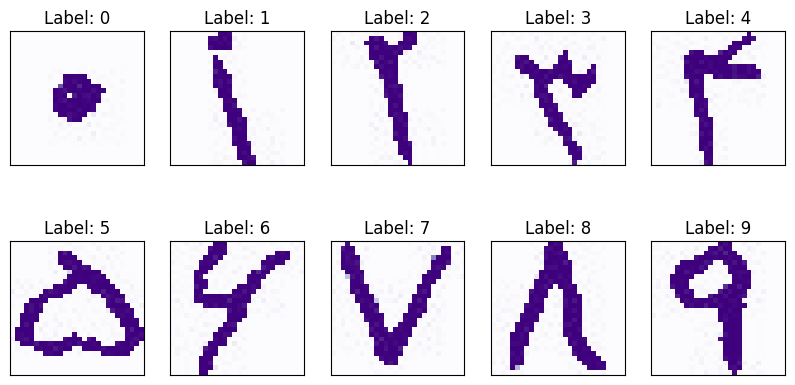

In [ ]:
# import os
# import random
# import matplotlib.pyplot as plt
# from PIL import Image

mainfolder = "/content/persian-handwritten-digits/Train"
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(10,5))
for i in range(10):
    fileNameList = os.listdir(mainfolder + "/class_" + str(i))
    image_filename = random.choice(fileNameList)
    image_path = os.path.join(mainfolder,"class_" + str(i), image_filename)
    image = Image.open(image_path)
    img = axs[int(i >= 5), i%5].imshow(image ,cmap='Purples')
    img.axes.get_yaxis().set_visible(False)
    img.axes.get_xaxis().set_visible(False)
    img.axes.set_title(f'Label: {i}')


In [ ]:
# from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
# from tensorflow.keras.models import Sequential

CNN = Sequential()

CNN.add(Conv2D(filters = 12, kernel_size = (3, 3), activation= 'relu', input_shape = (28, 28, 1)))
CNN.add(Conv2D(filters = 20, kernel_size = (3, 3), activation= 'relu'))
CNN.add(MaxPooling2D(pool_size=(2,2)))
CNN.add(Flatten())
CNN.add(Dense(20, activation = 'relu'))
CNN.add(Dense(10, activation = 'softmax'))

CNN.compile(loss= "categorical_crossentropy", optimizer = "adam" ,metrics = ["accuracy"])
CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 12)        120       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 20)        2180      
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 20)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 2880)              0         
                                                                 
 dense (Dense)               (None, 20)                57620     
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                        

In [ ]:
CNN.compile(loss= "categorical_crossentropy", optimizer = "adam" ,metrics = ["accuracy"])

In [ ]:
history = CNN.fit(
    trianDataSet,
    epochs=15,
    verbose=1,
    validation_data=ValDataSet)

Epoch 1/15
1641/1641 [==============================] - 64s 32ms/step - loss: 0.3274 - accuracy: 0.8765 - val_loss: 0.0320 - val_accuracy: 0.9898
Epoch 2/15
1641/1641 [==============================] - 57s 35ms/step - loss: 0.0303 - accuracy: 0.9913 - val_loss: 0.0176 - val_accuracy: 0.9942
Epoch 3/15
1641/1641 [==============================] - 54s 33ms/step - loss: 0.0150 - accuracy: 0.9954 - val_loss: 0.0099 - val_accuracy: 0.9970
Epoch 4/15
1641/1641 [==============================] - 53s 33ms/step - loss: 0.0117 - accuracy: 0.9963 - val_loss: 0.0106 - val_accuracy: 0.9969
Epoch 5/15
1641/1641 [==============================] - 53s 33ms/step - loss: 0.0095 - accuracy: 0.9970 - val_loss: 0.0091 - val_accuracy: 0.9970
Epoch 6/15
1641/1641 [==============================] - 53s 33ms/step - loss: 0.0064 - accuracy: 0.9980 - val_loss: 0.0144 - val_accuracy: 0.9959
Epoch 7/15
1641/1641 [==============================] - 53s 32ms/step - loss: 0.0057 - accuracy: 0.9980 - val_loss: 0.0084 -

In [ ]:
results = CNN.evaluate(testDataSet)

print("Test loss:", results[0])
print("Test accuracy:", results[1])

469/469 [==============================] - 11s 24ms/step - loss: 0.0111 - accuracy: 0.9978
Test loss: 0.011119513772428036
Test accuracy: 0.9977666735649109


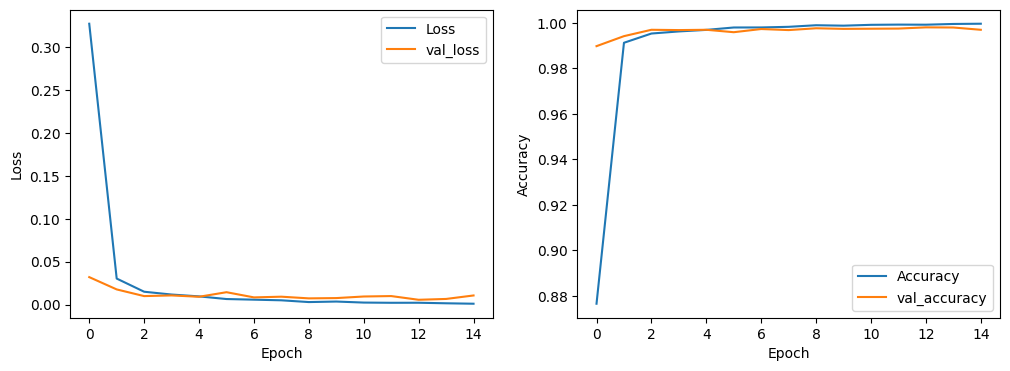

In [ ]:
# import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# import numpy as np

Y_pred = CNN.predict(testDataSet)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = testDataSet.labels

469/469 [==============================] - 12s 24ms/step


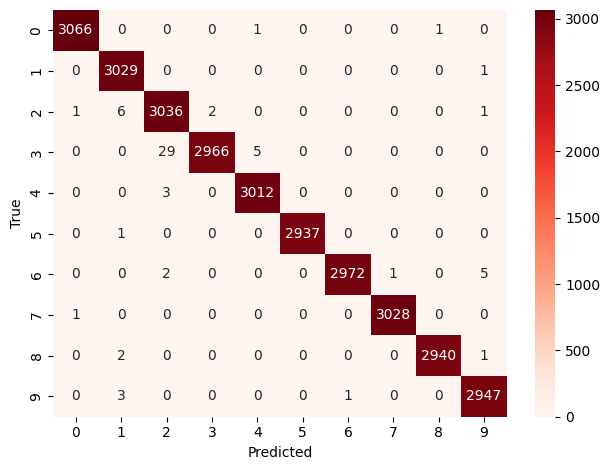

In [ ]:
# import seaborn as sns
# from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_true, Y_pred_classes)
sns.heatmap(cm, annot=True, cmap='Reds',fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

In [ ]:
# import pandas as pd

dataframe_ = pd.DataFrame({
    "path" : testDataSet.filepaths,
    "Y_true" : testDataSet.labels,
    "Y_pred" : Y_pred_classes
})

dataframe = dataframe_[dataframe_["Y_true"] != dataframe_["Y_pred"]]
dataframe # The wrong prediction.


,path,Y_true,Y_pred
2351,/content/persian-handwritten-digits/Test/class...,0,8
2439,/content/persian-handwritten-digits/Test/class...,0,4
5722,/content/persian-handwritten-digits/Test/class...,1,9
6202,/content/persian-handwritten-digits/Test/class...,2,1
6541,/content/persian-handwritten-digits/Test/class...,2,1
...,...,...,...
26006,/content/persian-handwritten-digits/Test/class...,8,9
27529,/content/persian-handwritten-digits/Test/class...,9,6
28281,/content/persian-handwritten-digits/Test/class...,9,1
28401,/content/persian-handwritten-digits/Test/class...,9,1


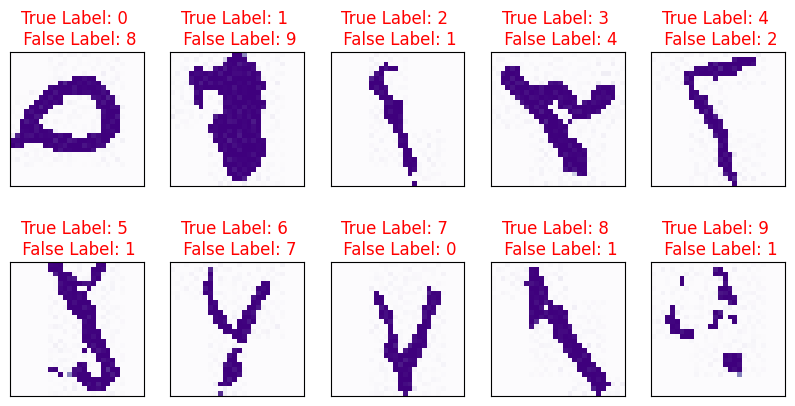

In [ ]:
# import matplotlib.pyplot as plt
# from PIL import Image

selected_rows = dataframe.groupby("Y_true").apply(lambda x: x.sample(n=1))
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(10,5))
for i in range(10):
    image_path = selected_rows.path.iloc[i]
    image = Image.open(image_path)
    img = axs[int(i >= 5), i%5].imshow(image ,cmap='Purples')
    img.axes.get_yaxis().set_visible(False)
    img.axes.get_xaxis().set_visible(False)
    img.axes.set_title(f'True Label: {selected_rows.Y_true.iloc[i]} \n False Label: {selected_rows.Y_pred.iloc[i]}', color = 'red')
